In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')


data_Numeric = data_Numeric.dropna()
useless = ["zipcode","latitude","longitude"]
data_Numeric_changed=data_Numeric.drop(axis=1,columns=useless)

price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])



data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,800.0,2000.0,500.0,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,1575.0,5800.0,300.0,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,699.0,2388.0,200.0,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [34]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.25)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (532, 27) (532, 1) (532, 1)
Test Set  : (178, 27) (178, 1) (178, 1)


price                          0.020492
id                             0.076118
host_total_listings_count     -0.190239
accommodates                  -0.037327
bathrooms                     -0.014347
bedrooms                      -0.008820
beds                           0.009325
weekly_price                   0.023811
monthly_price                  0.056934
security_deposit               0.022372
cleaning_fee                   0.009892
guests_included               -0.003429
extra_people                  -0.085373
minimum_nights                 0.073872
maximum_nights                -0.064799
availability_30               -0.130066
availability_90               -0.099745
availability_365              -0.110405
number_of_reviews              0.072585
review_scores_rating           1.000000
review_scores_accuracy         0.649144
review_scores_cleanliness      0.675708
review_scores_checkin          0.639938
review_scores_communication    0.668801
review_scores_location         0.414712


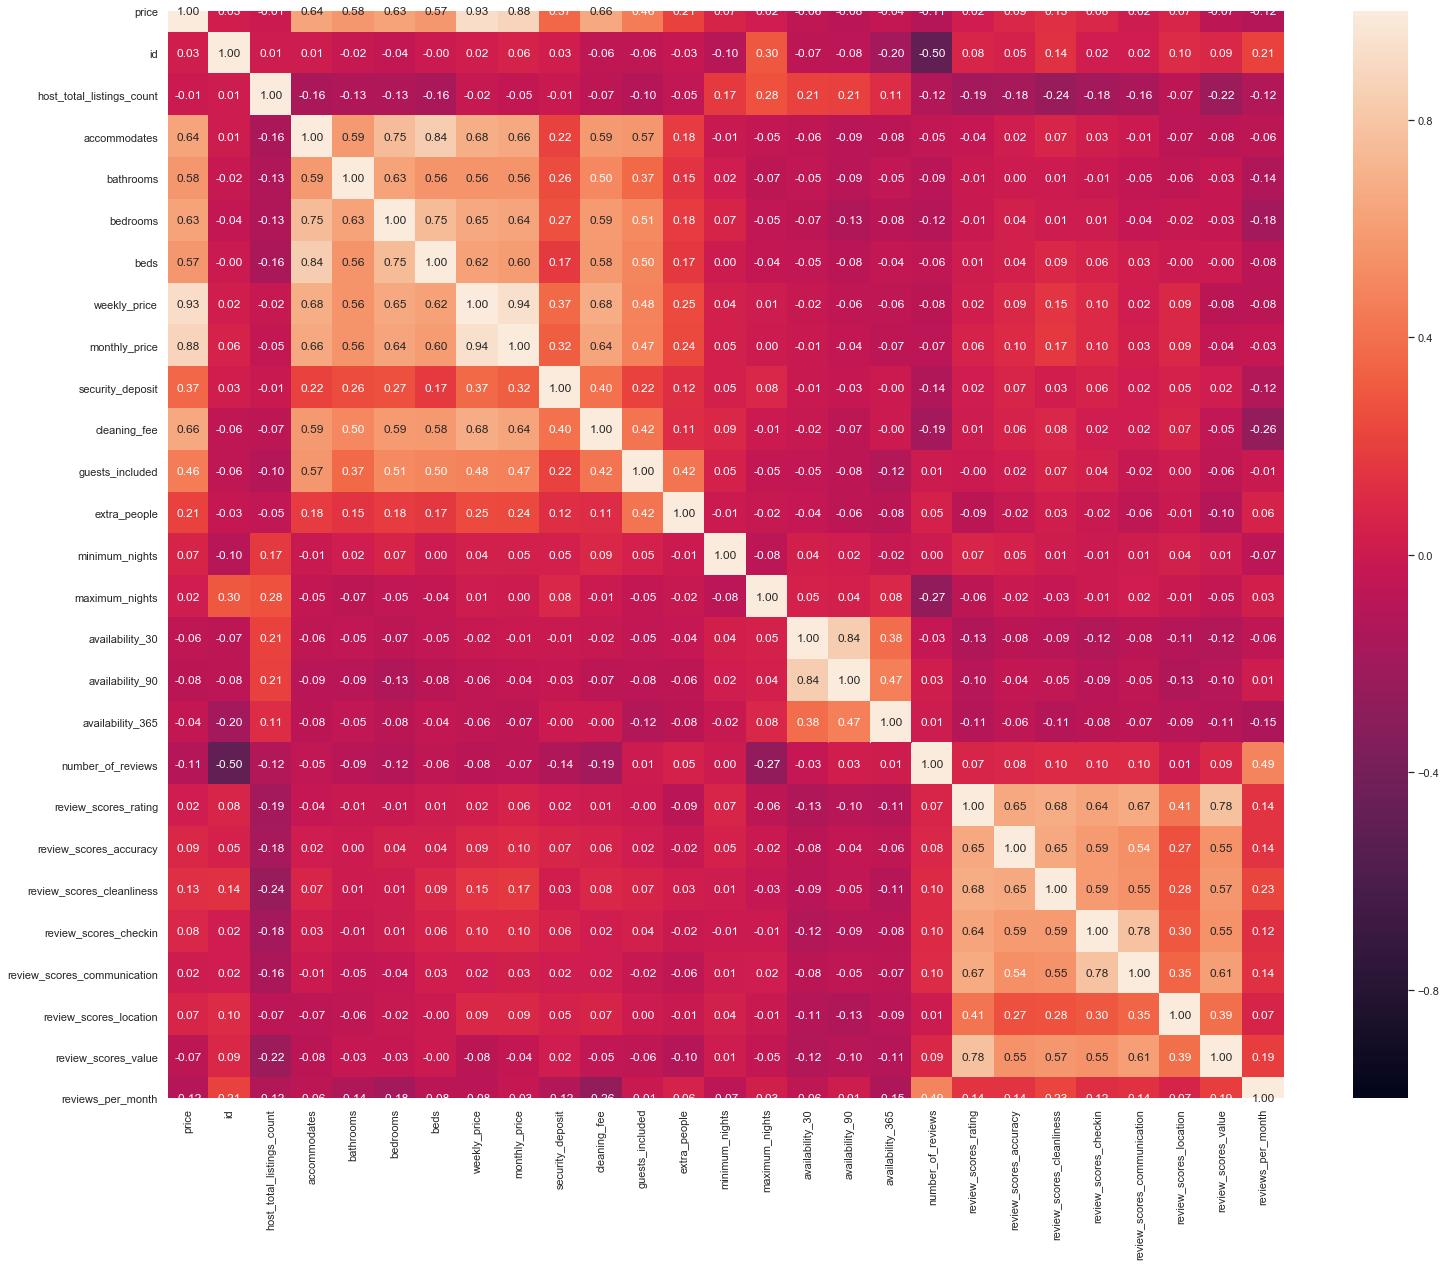

In [35]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

trainDF.corr()['review_scores_rating']

In [36]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1

Multi_High_Related_Train = {}    
Multi_High_Related_Test = {}
for var in highrelation:
    Multi_High_Related_Train[var] = pd.DataFrame(data_Numeric_Train[[var]])
    Multi_High_Related_Test[var] = pd.DataFrame(data_Numeric_test[[var]])




Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: security_deposit
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


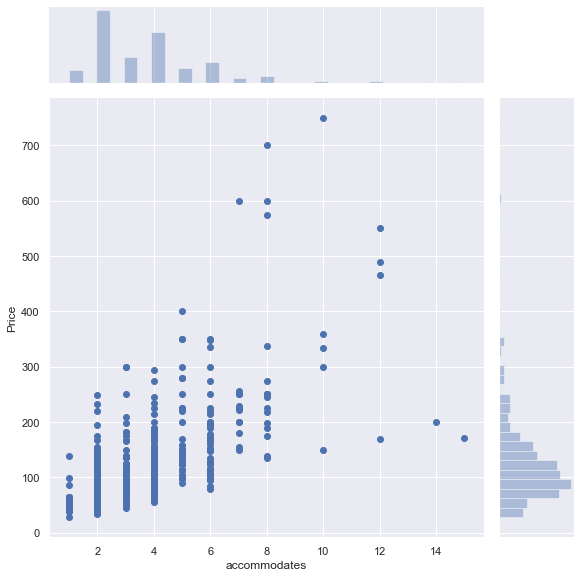

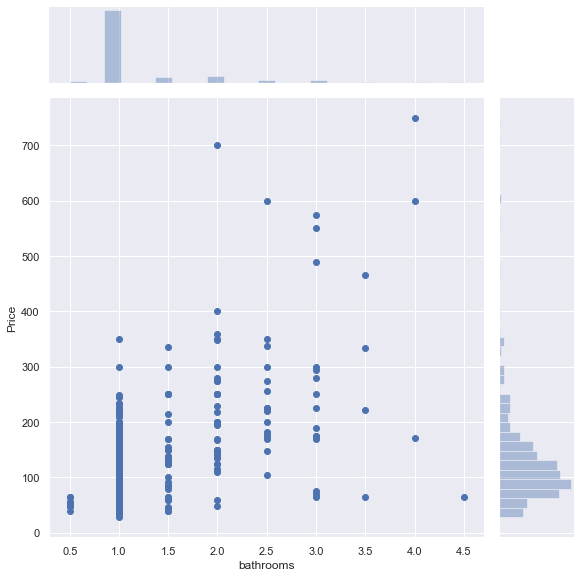

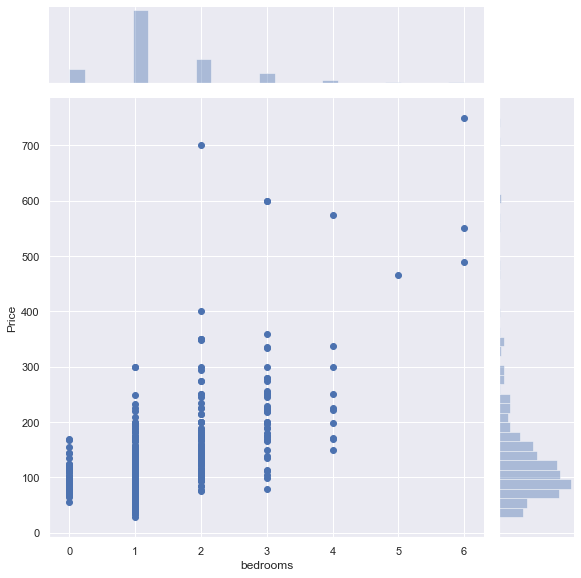

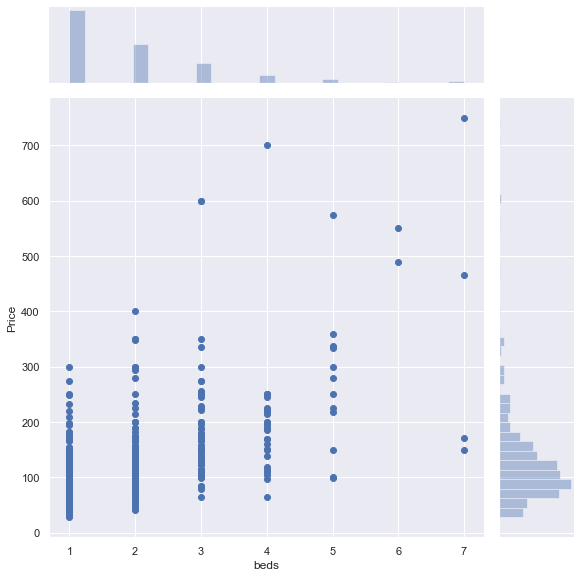

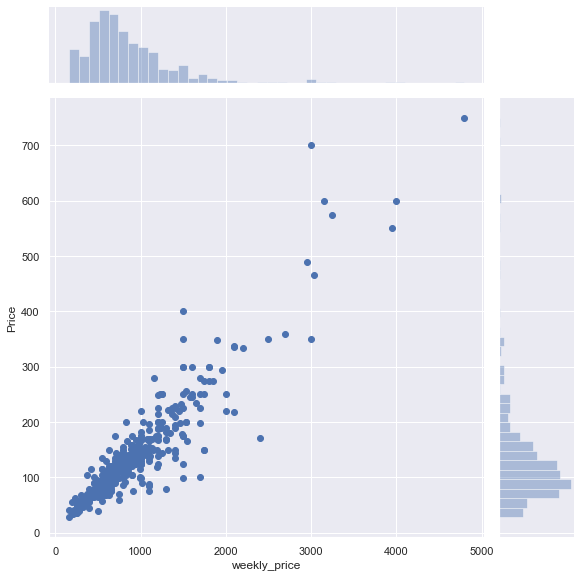

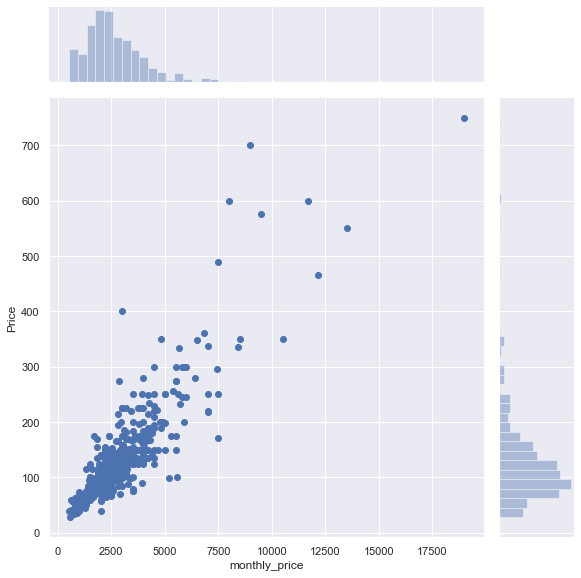

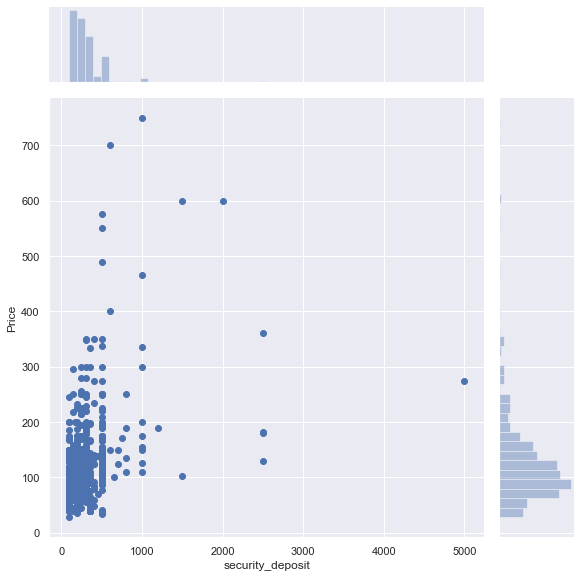

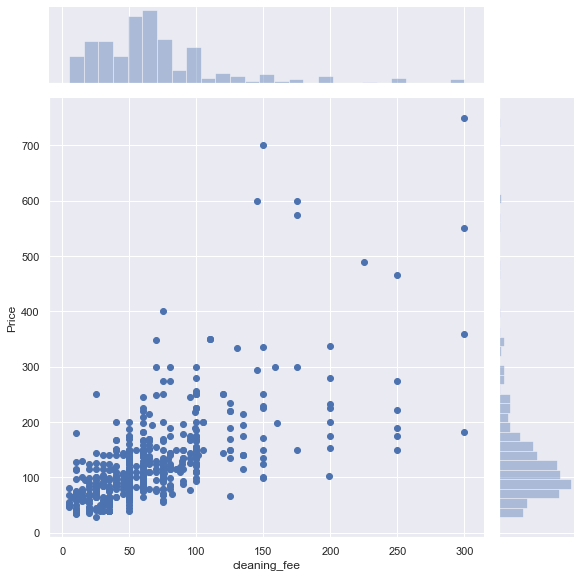

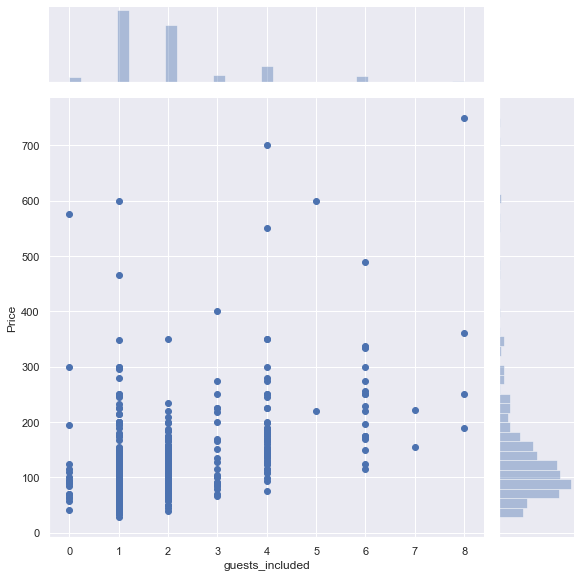

In [37]:
for var in Multi_High_Related_Train:
    x = sb.jointplot(Multi_High_Related_Train[var], price_Train, height = 8)
    x.set_axis_labels(xlabel=var, ylabel='Price')
    

In [38]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

index = 0
linreg = {}

        

for var in Multi_High_Related_Train:
    linreg[var] = Lasso()
    linreg[var].fit(Multi_High_Related_Train[var], price_Train)
 

In [39]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    price_train_pred[var]={} 
    price_test_pred[var]={} 



for var in linreg:
    price_train_pred[var] = linreg[var].predict(Multi_High_Related_Train[var])
    price_test_pred[var] = linreg[var].predict(Multi_High_Related_Test[var])


In [40]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    print("For [",var,"]")
    print("Train Explained Variance (R^2) \t:", linreg[var].score(Multi_High_Related_Train[var], price_Train))
    print("Test Explained Variance (R^2) \t:", linreg[var].score(Multi_High_Related_Test[var], price_test))
    print()


For [ accommodates ]
Train Explained Variance (R^2) 	: 0.40536662394537604
Test Explained Variance (R^2) 	: 0.3514444634759426

For [ bathrooms ]
Train Explained Variance (R^2) 	: 0.33367458984326837
Test Explained Variance (R^2) 	: 0.3173272434136952

For [ bedrooms ]
Train Explained Variance (R^2) 	: 0.39607107557890076
Test Explained Variance (R^2) 	: 0.36678163412081555

For [ beds ]
Train Explained Variance (R^2) 	: 0.32986624457117075
Test Explained Variance (R^2) 	: 0.2442467894026693

For [ weekly_price ]
Train Explained Variance (R^2) 	: 0.8599105577628406
Test Explained Variance (R^2) 	: 0.881045028217539

For [ monthly_price ]
Train Explained Variance (R^2) 	: 0.7762617556977065
Test Explained Variance (R^2) 	: 0.8622804125222322

For [ security_deposit ]
Train Explained Variance (R^2) 	: 0.1338452867787343
Test Explained Variance (R^2) 	: 0.11305104081066074

For [ cleaning_fee ]
Train Explained Variance (R^2) 	: 0.43318579951059555
Test Explained Variance (R^2) 	: 0.292104

In [80]:
#try predicting

try_Pred = data_Numeric_changed[data_Numeric_changed["id"].isin(["4454295"])]
data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,500.0,150.0,1,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,300.0,95.0,1,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,200.0,80.0,1,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [81]:
data_needed = pd.DataFrame(try_Pred[Multi_High_Related_Train[0][3].columns])
prediction = linreg[0][3].predict(data_needed)
print("Predicted:",prediction)
print("Actual:", try_Pred['price'])

Predicted: [[177.27361822]]
Actual: 11    99.0
Name: price, dtype: float64
